To generate a presentation run the following command:

``jupyter nbconvert Lecture_6.ipynb --to slides --post serve``

# How to use this notebook

This notebook serves as both a presentation and interactive environment for students to experiment with Python. If you run it in the interactive mode using [Binder](https://mybinder.org/v2/gh/krzysztofarendt/deap/master), you can modify all code cells. Press `Shift+Enter` to run the modified code.

Link to the repository: https://github.com/krzysztofarendt/deap 

# NumPy - vectors and matrices

[NumPy](http://www.numpy.org/) is the fundamental package for scientific computing with Python. It contains among other things:

* a powerful N-dimensional array object
* useful linear algebra, Fourier transform, and random number capabilities

To use NumPy, first import it:

In [1]:
import numpy as np

The following presentation is based on the official [NumPy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html).

### Array creation

NumPy's main object is the homogeneous multidimensional array, called `ndarray`. It is a table of elements, all of the same type (usually floats), indexed by a tuple of positive integers.

In NumPy array dimensions are called *axes*.

An array can be created from nested lists:

In [21]:
a = np.array([[1., 0., 0.,],
              [0., 1., 2.]])
print(a)

[[1. 0. 0.]
 [0. 1. 2.]]


...or by using special functions:

In [20]:
b = np.zeros((3, 3))
print(b)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [19]:
c = np.ones((3, 2))
print(c)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


In [18]:
d = np.full((2, 2), 5.)
print(d)

[[5. 5.]
 [5. 5.]]


There are also two very useful functions for creating one-dimensional arrays:

In [47]:
e = np.arange(0, 10, 2)  # Start from 0 with step 2, while < 10
print(e)

[0 2 4 6 8]


In [46]:
f = np.linspace(0, 5, 11)  # 11 elements from 0 to 5
print(f)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


Some of the important attributes of `ndarray` are as follows:

* `ndarray.ndim` - the number of axes (dimensions) of the array,
* `ndarray.shape` - the dimensions of the array,
* `ndarray.size` - the total number of elements of the array,
* `ndarray.dtype` - an object describing the type of the elements in the array.

Standard Python types cn be used as `dtype`. Additionally NumPy provides types of its own: `numpy.int32`, `numpy.int16`, and `numpy.float64` are some examples.


In [17]:
print(a)
print('ndim =', a.ndim)
print('shape =', a.shape)
print('size =', a.size)
print('dtype =', a.dtype)

[[1. 0. 0.]
 [0. 1. 2.]]
ndim = 2
shape = (2, 3)
size = 6
dtype = float64


### Basic operations

Arithmetic operators on arrays apply *elementwise*. A new array is created and filled with the result.

In [22]:
a = np.array([[1., 2.], [3., 6.]])
b = np.array([[2., 2.], [3., 3.]])
c = a + b
print(c)

[[3. 4.]
 [6. 9.]]


In [23]:
print(a * b)

[[ 2.  4.]
 [ 9. 18.]]


In [24]:
print(a / b)

[[0.5 1. ]
 [1.  2. ]]


Scalars are also applied *elementwise*:

In [26]:
print(a * 5)

[[ 5. 10.]
 [15. 30.]]


In [27]:
print(a - 1)

[[0. 1.]
 [2. 5.]]


Matrix product can be performed using the `@` operator (in Python >= 3.5) or the `dot` function or method:

In [33]:
c = a @ b
d = np.dot(a, b)
e = a.dot(b)

Please check that all `c`, `d`, and `e` are equal.

Note, that if you compare two arrays using `==`, you get an array containing `bool` elements.

In [39]:
c == d

array([[ True,  True],
       [ True,  True]])

In [40]:
d == e

array([[ True,  True],
       [ True,  True]])

Since the return type is an array, you can use array methods with it. One of the methods is `ndarray.all()`, which checks if all elements in the array are true:

In [41]:
(c == d).all()

True

Two arrays can be joined:

In [50]:
a = np.arange(0, 5, 1)
b = np.arange(5, 10, 1)
c = np.vstack((a, b))  # Note double parentheses!
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [53]:
d = np.hstack((a, b))  # Note double parentheses!
print(d)

[0 1 2 3 4 5 6 7 8 9]


### Reshaping

An array can be reshaped:

In [56]:
a = np.arange(0, 9, 1)
b = a.reshape((3, 3))
print(b)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Note, that the number of elements in the reshaped array **must match** the original array.

### Indexing, slicing, and iterating

Similar rules as in Python lists apply, however indexes for all dimensions can be given in a single pair of brackets.

Analyze the following cases:

In [67]:
a = np.arange(0, 9, 1).reshape((3, 3))

print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [83]:
print(a[0, 0])
print(a[0])
print(a[-1])
print(a[0:2])
print(a[0:2, 0])

0
[0 1 2]
[6 7 8]
[[0 1 2]
 [3 4 5]]
[0 3]


`:` can be used to select all elements in a given axis:

In [ ]:
print(a[0, :])    # Get first column
print(a[:, :])    # Get a complete copy of a

Iterating over arrays is similar to iterating over lists:

In [88]:
a = np.arange(0, 9, 1).reshape((3, 3))

# Approach 1
for k in a:
    for j in k:
        print(j, end=' ')

0 1 2 3 4 5 6 7 8 

In [90]:
# Approach 2
for k in range(len(a)):
    for j in range(len(a[k])):
        print(a[k, j], end=' ')

0 1 2 3 4 5 6 7 8 

### NumPy and Pandas

The `DataFrame` object in Pandas is using Numpy's arrays internally. You can access it with `DataFrame.values`:

In [65]:
import pandas as pd

df = pd.DataFrame([[1, 2], [3, 4]])
a = df.values

print('DataFrame:')
print(df)
print()
print('ndarray:')
print(a)

DataFrame:
   0  1
0  1  2
1  3  4

ndarray:
[[1 2]
 [3 4]]


### Numpy functions

NumPy provide many common mathematical functions that can be used with arrays, from simple trigonometrical functions to linear algebra. In many cases their names are self-explanatory, e.g.:
* np.sin(x) - sine,
* np.cos(x) - cosine,
* np.max(x) - return maximum number.

The full list is available [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/index.html).

Example:

In [104]:
a = np.linspace(0, 5, 10)
print(a)

[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]


In [103]:
print(np.sin(a))

[ 0.          0.52741539  0.8961922   0.99540796  0.79522006  0.35584199
 -0.19056796 -0.67965796 -0.96431712 -0.95892427]


In [101]:
print(np.max(a))

5.0


# Matplotlib - visualization

Matplotlib is a Python 2D plotting library which produces publication quality figures.

Check out what kind of plots can be generated with Matplotlib: [https://matplotlib.org/gallery/index.html](https://matplotlib.org/gallery/index.html).

Today we'll learn how to create basic plots: **linear**, **scatter**, and **bar plots**.

This tutorial is based on: [https://matplotlib.org/tutorials/introductory/pyplot.html](https://matplotlib.org/tutorials/introductory/pyplot.html)

First, let's import Matplotlib:

In [91]:
import matplotlib.pyplot as plt  # We import the "pyplot" interface, which is advised for beginners

`matplotlib.pyplot` is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure, e.g.: 
* creates a figure,
* creates a plotting area in a figure,
* plots some lines in a plotting area,
* decorates the plot with labels.

In `matplotlib.pyplot` various states are preserved across function calls, so that it keeps track of things like the current figure and plotting area, and the plotting functions are directed to the current figure.

Generating visualizations with pyplot is very quick:

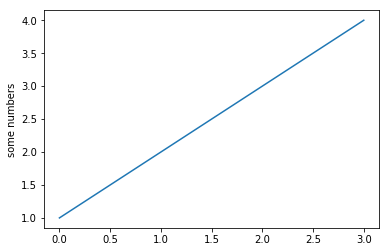

In [107]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to the `plot()` command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are `[0,1,2,3]`.

`plot()` is a versatile command, and will take an arbitrary number of arguments. For example, to plot x versus y, you can issue the command:

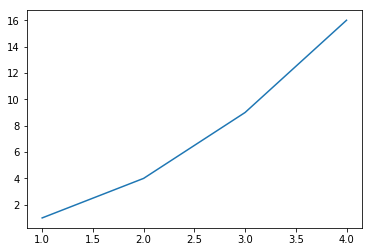

In [109]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.show()

### Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue:

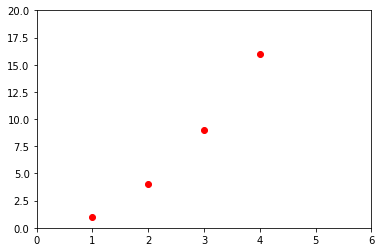

In [112]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

See the `plot()` [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for a complete list of line styles and format strings. The `axis()` command in the example above takes a list of `[xmin, xmax, ymin, ymax]` and specifies the viewport of the axes.

If Matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use NumPy arrays. In fact, **all sequences are converted to NumPy arrays internally**. The example below illustrates a plotting several lines with different format styles in one command using arrays.

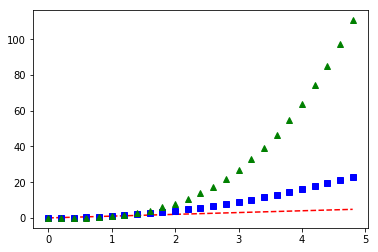

In [113]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties.

Use keyword args:

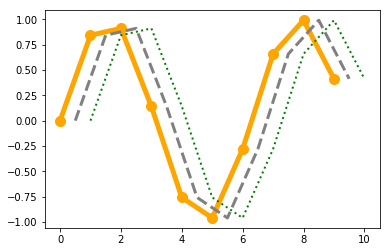

In [179]:
x = np.arange(0, 10, 1)
y = np.sin(x)

plt.plot(x,       y, linewidth=5.0, color='orange', linestyle='-', marker='o', markersize=10)
plt.plot(x + 0.5, y, linewidth=3.0, color='gray',   linestyle='--')
plt.plot(x + 1.0, y, linewidth=2.0, color='green',  linestyle=':')
plt.show()

Use the MATLAB-like syntax:

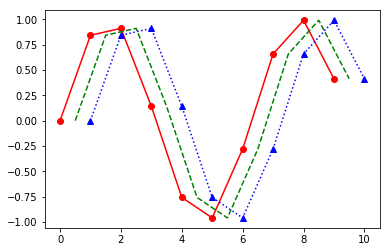

In [186]:
plt.plot(x, y, 'r-o', x + 0.5, y, 'g--', x + 1.0, y, 'b:^')
plt.show()

### Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with `pandas.DataFrame`.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

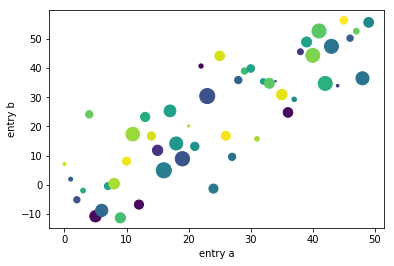

In [155]:
# Create some map with random numbers
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

#           (x)  (y) (color) (size)
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

Maybe a more familiar example with a `DataFrame`:

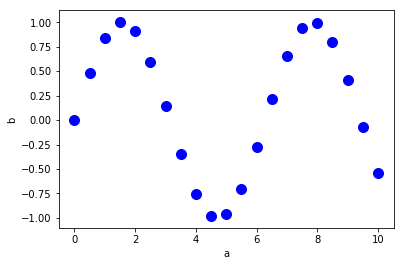

In [156]:
a = np.linspace(0, 10, 21)
b = np.sin(a)
df = pd.DataFrame(data={'a': a, 'b': b})

#           (x)  (y)  (color)   (size)
plt.scatter('a', 'b', c='blue', s=100, data=df)
plt.xlabel('a')
plt.ylabel('b')
plt.show()

This is the `DataFrame` from the previous plot:

In [150]:
print(df)

       a         b
0    0.0  0.000000
1    0.5  0.479426
2    1.0  0.841471
3    1.5  0.997495
4    2.0  0.909297
5    2.5  0.598472
6    3.0  0.141120
7    3.5 -0.350783
8    4.0 -0.756802
9    4.5 -0.977530
10   5.0 -0.958924
11   5.5 -0.705540
12   6.0 -0.279415
13   6.5  0.215120
14   7.0  0.656987
15   7.5  0.938000
16   8.0  0.989358
17   8.5  0.798487
18   9.0  0.412118
19   9.5 -0.075151
20  10.0 -0.544021


### Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

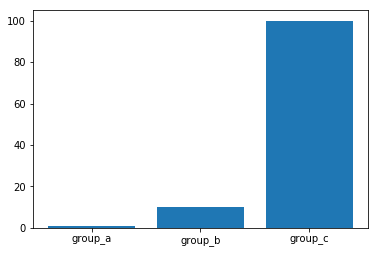

In [163]:
plt.bar(names, values)
plt.show()

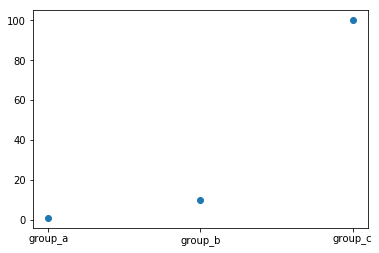

In [162]:
plt.scatter(names, values)
plt.show()

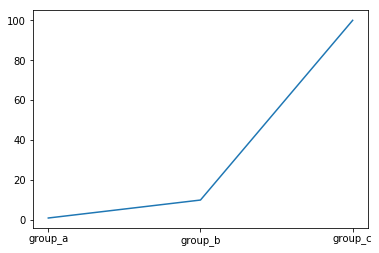

In [161]:
plt.plot(names, values)
plt.show()

### Subplots

It is sometimes useful to present multiple plots next to one another. It's easy in Matplotlib:

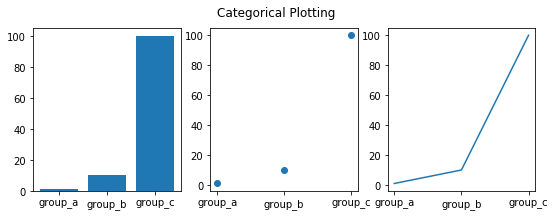

In [188]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)  # rows, columns, plot number
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()